### <center>Le nouveau Frankenstein:</center><br><center>quand l'intelligence artificielle peut écrire le fiction</center>

Ces dernières années, l'intelligence artificielle a évolué au point qu'elle peut créer des œuvres de fiction. Mais à mesure que l'IA commence à écrire ses propres histoires, la ligne entre l'homme et la machine commence à se brouiller. Plus l'IA devient "créative", plus il sera difficile de différencier entre les textes écrites par l'humain et par la machine. Est-ce que les méthodes de stylométrie peuvent nous aider dans la distinction qui a écrit un livre? Est-ce que la machine peut reproduit fidèlement le style d'auteur? Les êtres humains peuvent-ils contrôler le monstre qu'ils ont créé?

#### Préparation de l'environement 

Avant proceder aux analyses, j'importe les modules Python nécessaires pour les traitements des textes.
Actuellement je travaille avec <b>Python 3.9</b><br>
<br>
<b>Les libraries:</b><br>
<br>
<b>nltk</b> - Natural Language Toolkit, un module Python dédié au traitement du langage naturel.<br>
<b>matplotlib</b> - la librairie pour pouvoir afficher les graph<br><br>

In [1]:
import nltk

In [2]:
#nltk.download('punkt')

In [3]:
#nltk.download('stopwords')

In [4]:
#nltk.download('averaged_perceptron_tagger')

In [5]:
#nltk.download()

In [6]:
from nltk import punkt

In [7]:
from nltk.corpus import stopwords

In [8]:
import matplotlib.pyplot as plt

pour afficher matplotlib en Jupyter Notebook

In [9]:
%matplotlib inline

#### La préparation des données pour l'analyse


Avant de pouvoir procéder à une analyse stylométrique, nous devons charger les fichiers txt pour travailler plus convenablement avec les données. Dans mon travail je vais utiliser avec trois cathégories de texte pour faire l'analyse avec les méthodes d'attribution d'auteur. 
<br><br>
La fonction text_to_string:
<br>
1. Elle prend en paramètre un nom de fichier.
2. Elle ouvre le fichier et lit le contenu.
3. Elle renvoie le contenu du fichier.

In [11]:
def text_to_string(filename):
    with open(filename) as infile:
        return infile.read()

Les oeuvres analysés sont convertis en string et stockés dans le dictionaire string_by_author.<br><br>
J'ai trois textes: <br>
1. strings_by_author['Shelley'] répresent les deux oeuvres majeurs de Mary Shelley (Frankenstein et The Last Man)<br>
2. strings_by_author['Unwritten'] répresent les oeuvres généré par GPT3<br>
3. strings_by_author['FanFiction']répresent l'oeuvre de FanFiction, écrit dans le style d'auteur (<a href="lien">https://www.fanfiction.net/s/13990191/1/Stay</a>)<br><br>


In [12]:
strings_by_author = dict()
strings_by_author['Shelley'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/frankenstein.txt')+text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/LastMan.txt')
strings_by_author['Unwritten'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/unwritten.txt')
strings_by_author['FanFiction'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/fanfic.txt')

Pour explorer le début de corpus et vérifier que les donnés sont stocké correctement je vais afficher le premiers 300 caractères de chaque corpus. 

In [13]:
print("First 300 characters from Shelley's novels:\n" + strings_by_author['Shelley'][:300])  

First 300 characters from Shelley's novels:


Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my w


In [14]:
print("First 300 characters from GPT3's novels:\n" + strings_by_author['Unwritten'][:300]) 

First 300 characters from GPT3's novels:
In the days that followed, I lost myself in the old books at my father’s library. I could not read them all, of course; but I read a great many of them. I rose early, before the sun, and then I could not sleep at night. I had a nameless, restless energy; but I did not know what to do with it. I was 


In [15]:
print("First 300 characters from Fan Fiction's novels:\n" + strings_by_author['FanFiction'][:300])

First 300 characters from Fan Fiction's novels:
Stay
By: Pappenheimer
November 3, 1793. Victor Frankenstein stands alone in his apartment while the storm rages about. Life from Death. It's his chance to steal from what was God's domain. But when his Creation stirs, he finds an unsightly monster instead of perfection. But rather than both Frankens


La fonction word_dict<br>

1. Elle crée un dictionnaire vide appelé words_by_author.
2. Elle parcours le dictionnaire strings_by_author.
3. Pour chaque auteur, elle tokenise la chaîne et met-la en minuscules.
4. Elle ajoute la liste de mots au dictionnaire words_by_author.

In [16]:
def word_dict(strings_by_author):
    
    words_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = ([token.lower() for token in tokens
                                    if token.isalpha()])
    return words_by_author

Nous allons stocker les résultat de fonction *word_dic(string_by_author)* dans un variable *words_by_author* et on compte combien de tokens il y a dans les differents corpus.

In [17]:
words_by_author = word_dict(strings_by_author)
for author in words_by_author:
    print(author, len(words_by_author[author]))
    #print(author, words_by_author[author][:300])

Shelley 247598
Unwritten 19395
FanFiction 59132


Pour pouvoir faire les comparaisons de differents textes, nous avons besoin connaître le corpus qui est le plus court. <br><br>
Voici ce que fait la fonction *shortes_corpus(words_by_author)*:
1. Elle crée une liste vide appelée word_count.
2. Elle parcourt le dictionnaire words_by_author.
3. Pour chaque auteur, elle ajoute la longueur de la liste de mots à la liste word_count.
4. Elle trouve la valeur minimale dans la liste word_count.
5. Elle renvoie la valeur minimale.

In [30]:
def shortest_corpus(words_by_author):
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        
    len_shortest_corpus = min(word_count)
    return len_shortest_corpus

In [31]:
len_shortest_corpus = shortest_corpus(words_by_author)
print('Number of words in shortest corpus is = {}\n'.format(len_shortest_corpus))

Number of words in shortest corpus is = 19395



Dans mon cas, je corpus le plus court est celui-là qui généré par GPT3. 

 Plot stopwords freq by author, truncated to shortest corpus length.
 Le premiers test à réaliser est la comparaison de fréquence de stopwords (ou les mots fonctionels) entre nos diffférents corpus. <br><br>
Voici ce que fait la fonction *stopword_test(words_by_author, len_shortest_corpus)*:<br>
1. Elle prend en entrée le dictionnaire words_by_author.
2. Elle crée un nouveau dictionnaire appelé stopwords_by_author_freq_dist.
3. Elle parcourt le dictionnaire words_by_author et, pour chaque auteur, elle crée une liste de mots fonctionnels.
4. Elle crée ensuite une distribution de fréquences pour les mots fonctionnels de chaque auteur.
5. Elle trace la distribution de fréquences pour chaque auteur.

In [48]:
def stopwords_test(words_by_author, len_shortest_corpus):
    stopwords_by_author_freq_dist = dict()
    stop_words = set(stopwords.words('english'))  
    print('Number of stopwords = {}\n'.format(len(stop_words)))
    #print('Stopwords = {}\n'.format(stop_words))
    for i, author in enumerate(words_by_author):
        stopwords_by_author = [word for word in words_by_author[author]
        [:len_shortest_corpus] if word in stop_words]
        stopwords_by_author_freq_dist[author] = nltk.FreqDist(stopwords_by_author)
        stopwords_by_author_freq_dist[author].plot(30,title=author)

Number of stopwords = 179



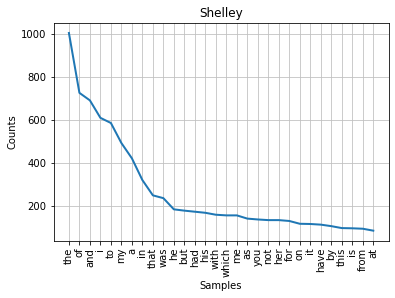

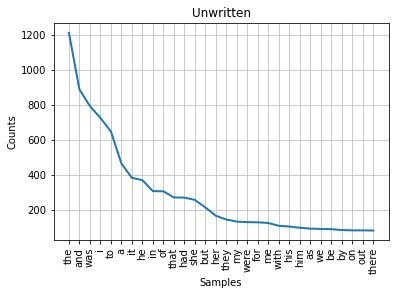

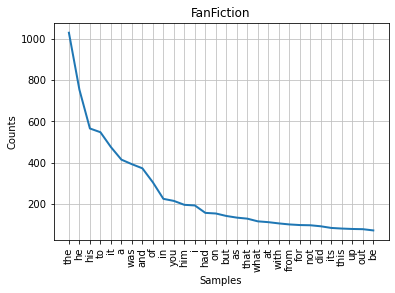

In [49]:
stopwords_test(words_by_author, len_shortest_corpus)

word_length_test par mendenhall test

Voici ce que fait la fonction *mendenhall_test(words_by_author, len_shortest_corpus)*:
1. Elle prend en entrée une liste de mots par auteur.
2. Elle crée un dictionnaire de fréquences de mots par auteur.
3. Elle crée un dictionnaire de fréquences de mots par auteur, mais on compare uniquement les corpus de la même taille, cela veut dire le corpus le plus court.
4. Elle crée un dictionnaire de mots

In [42]:
def mendenhall_test(words_by_author, len_shortest_corpus):
    mendenhall_by_author_freq_dist = dict()
    for i, author in enumerate(words_by_author):
        token_lengths = [len(word) for word in words_by_author[author]
        [:len_shortest_corpus]]
        mendenhall_by_author_freq_dist[author] = nltk.FreqDist(token_lengths)
        mendenhall_by_author_freq_dist[author].plot(15,title=author)

Voici ce que fait la fonction *vocab_test* qui prend un argument *words_by_author*:<br>
1. Pour chaque auteur, elle combine le corpus de l'auteur avec le corpus inconnu.
2. Elle trouve les 1000 mots les plus courants dans le corpus combiné.
3. Pour chacun des 1000 mots les plus communs, elle calcule le nombre d'observations et le nombre attendu pour l'auteur.
4. Elle calcule la statistique du chi carré

In [50]:
def vocab_test(words_by_author):
    chisquared_by_author = dict()
    for author in words_by_author:
        if author != 'Unwritten':
            # Combine corpus for author & unknown & find 1000 most-common words.
            combined_corpus = (words_by_author[author] +
                               words_by_author['Unwritten'])
            author_proportion = (len(words_by_author[author]) /
                                 len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))
            chisquared = 0

            # Calculate observed vs. expected word counts.
            for word, combined_count in most_common_words:
                observed_count_author = words_by_author[author].count(word)
                expected_count_author = combined_count * author_proportion
                chisquared += ((observed_count_author -
                                expected_count_author) ** 2 /
                               expected_count_author)
                chisquared_by_author[author] = chisquared
            print('Chi-squared for {} = {:.1f}'.format(author, chisquared))

    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print('Most-likely author by vocabulary is {}\n'.format(most_likely_author))

In [51]:
vocab_test(words_by_author)

Chi-squared for Shelley = 1422.1
Chi-squared for FanFiction = 2961.3
Most-likely author by vocabulary is Shelley



Voici ce que fait la fonction *parts_of_speech_test*:<br>
1. Elle prend en entrée le dictionnaire words_by_author et la longueur du plus court corpus.
2. Elle crée un nouveau dictionnaire appelé by_author_pos_freq_dist.
3. Elle parcourt le dictionnaire words_by_author.
4. Elle crée une liste de parties du discours

In [52]:
def parts_of_speech_test(words_by_author, len_shortest_corpus):
    by_author_pos_freq_dist = dict()
    for i, author in enumerate(words_by_author):
        pos_by_author = [pos[1] for pos in nltk.pos_tag(words_by_author[author]
                                                        [:len_shortest_corpus])]
        by_author_pos_freq_dist[author] = nltk.FreqDist(pos_by_author)
        by_author_pos_freq_dist[author].plot(35,title=author)

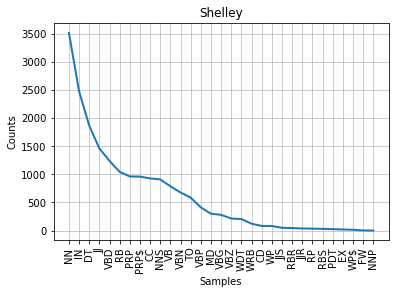

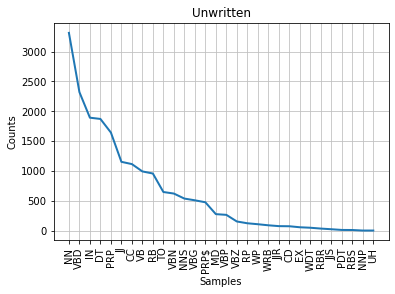

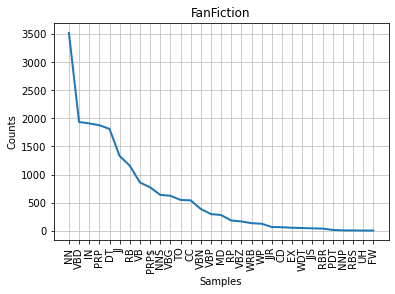

In [53]:
parts_of_speech_test(words_by_author, len_shortest_corpus)

Voici ce que fait la fonction *jaccard_test(words_by_author, len_shortest_corpus)*:
1. Elle crée un ensemble de mots uniques à partir du texte unwritten.
2. Elle parcours les auteurs, en créant un ensemble de mots uniques à partir du texte de chacue auteur.
3. Elle trouve l'intersection des mots uniques du texte unwritten et des
   mots uniques du texte de l'auteur.
4. Elle calcule la similarité de Jaccard entre le texte inconnu et le texte de  l'auteur.
5. Elle affiche la similarité de Jaccard pour chaque auteur.
6. Elle trouve l'auteur ayant la plus grande similarité de Jaccard.
7. Elle affiche l'auteur le plus susceptible.

In [54]:
def jaccard_test(words_by_author, len_shortest_corpus):
    jaccard_by_author = dict()
    unique_words_unknown = set(words_by_author['Unwritten']
                               [:len_shortest_corpus])
    authors = (author for author in words_by_author if author != 'Unwritten')
    for author in authors:
        unique_words_author = set(words_by_author[author][:len_shortest_corpus])
        shared_words = unique_words_author.intersection(unique_words_unknown)
        jaccard_sim = (float(len(shared_words)) / (len(unique_words_author) +
                                                   len(unique_words_unknown) -
                                                   len(shared_words)))
        jaccard_by_author[author] = jaccard_sim
        print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))

    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print('Most-likely author by similarity is {}'.format(most_likely_author))

In [55]:
jaccard_test(words_by_author, len_shortest_corpus)

Jaccard Similarity for Shelley = 0.2212637481130041
Jaccard Similarity for FanFiction = 0.2535429013140943
Most-likely author by similarity is FanFiction
